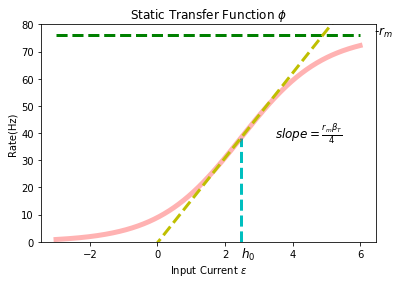

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
r_m=76.2
beta_T=0.82
h_0=2.46
phi=np.zeros(900)
count=0
for xi in np.arange(-3,6,0.01):
    phi[count]=r_m/(1+np.exp(-beta_T*(xi-h_0)))
    count=count+1
plt.figure()
plt.title("Static Transfer Function $\phi$")
plt.xlabel("Input Current $\epsilon$")
plt.ylabel("Rate(Hz)")
plt.ylim([0,80])
#plt.plot(np.arange(-3,6,0.01),phi_i)
plt.plot(np.arange(-3,6,0.01),phi,'-r',linewidth=5,alpha=0.3)
plt.vlines(h_0, 0,phi[int((h_0+3)/0.01)], colors = "c", linestyles = "dashed",linewidth=3)
plt.hlines(r_m,-3,6,colors='g',linestyles = "dashed",linewidth=3)
plt.text(6.4,r_m,'-$r_m$',size='12')
plt.text(h_0,-6,'$h_0$',size='12')
y_line=np.zeros(900)
count=0
slope=r_m*beta_T/4
for xi in np.arange(-3,6,0.01):
    y_line[count]=slope*xi-h_0*slope+phi[int((h_0+3)/0.01)]
    count=count+1
plt.plot(np.arange(-3,6,0.01),y_line,'--y',linewidth=3)
plt.text(h_0+1,phi[int((h_0+3)/0.01)],r'$slope=\frac{r_m \beta_T}{4}$',size='12')
plt.savefig('Figures/phi.png')

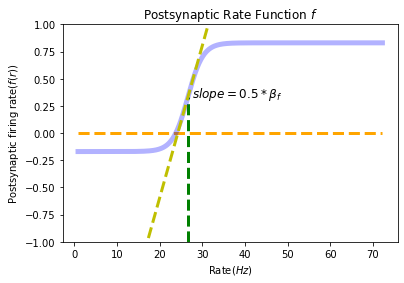

In [2]:
c=0.005
N=50000
x_f=26.6
beta_f=0.28
q_f=0.83
A=3.55
f=np.zeros(900)
r=np.zeros(900)
count=0
for xi in np.arange(-3,6,0.01):
    r[count]=r_m/(1+np.exp(-beta_T*(xi-h_0)))
    f[count]=0.5*(2*q_f-1+np.tanh(beta_f*(r[count]-x_f)))
    count=count+1
plt.figure()
plt.title('Postsynaptic Rate Function $f$')
plt.xlabel('Rate($Hz$)')
plt.ylabel('Postsynaptic firing rate($f(r)$)')
plt.ylim(-1,1)
plt.plot(r,f,'-b',linewidth=5,alpha=0.3)
plt.hlines(0,r[0],r[899],colors="orange",linestyles="dashed",linewidth=3)
plt.vlines(x_f,-1,(0.5*(2*q_f-1)),colors="g",linestyles="dashed",linewidth=3)
f_line=np.zeros(900)
f_slope=0.5*beta_f
for count in range(900):
    f_line[count]=f_slope*(r[count]-x_f)+0.5*(2*q_f-1)
plt.plot(r,f_line,'--y',linewidth=3)
plt.text(x_f+1,(0.5*(2*q_f-1)),r'$slope=0.5*\beta_f$',size='12')
plt.savefig('Figures/f.png')

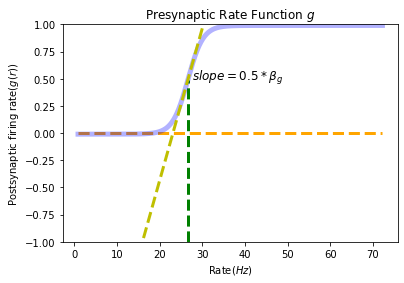

In [3]:
q_g=0.99
beta_g=beta_f
x_g=x_f
count=0
g=np.zeros(900)
for xi in np.arange(-3,6,0.01):
    g[count]=0.5*(2*q_g-1+np.tanh(beta_g*(r[count]-x_g)))
    count=count+1
plt.figure()
plt.title('Presynaptic Rate Function $g$')
plt.xlabel('Rate($Hz$)')
plt.ylabel('Postsynaptic firing rate($g(r)$)')
plt.ylim(-1,1)
plt.plot(r,g,'-b',linewidth=5,alpha=0.3)
plt.hlines(0,r[0],r[899],colors="orange",linestyles="dashed",linewidth=3)
plt.vlines(x_f,-1,(0.5*(2*q_g-1)),colors="g",linestyles="dashed",linewidth=3)
g_line=np.zeros(900)
g_slope=0.5*beta_f
for count in range(900):
    g_line[count]=g_slope*(r[count]-x_g)+0.5*(2*q_g-1)
plt.plot(r,g_line,'--y',linewidth=3)
plt.text(x_g+1,(0.5*(2*q_g-1)),r'$slope=0.5*\beta_g$',size='12')
plt.savefig('Figures/g.png')